In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import metrics
import pylab as pl

read from CSV


In [2]:
headers = ["x1","x2"]
train_x = pd.read_csv('/Users/xtarx/Documents/TUM/4th/MLMA/ex2-svm/twomoons/xtrain.cvs',names=headers)
headers = ["y"]
train_y = pd.read_csv('/Users/xtarx/Documents/TUM/4th/MLMA/ex2-svm/twomoons/ytrain.cvs',names=headers)
train=pd.concat([train_x, train_y], axis=1)

headers = ["x1","x2"]
test_x = pd.read_csv('/Users/xtarx/Documents/TUM/4th/MLMA/ex2-svm/twomoons/xtest.cvs',names=headers)
headers = ["y"]
test_y = pd.read_csv('/Users/xtarx/Documents/TUM/4th/MLMA/ex2-svm/twomoons/ytest.cvs',names=headers)
test=pd.concat([test_x, test_y], axis=1)

In [3]:
train.tail()
# test.tail()

,x1,x2,y
495,1.464900,0.17000,2
496,0.051546,0.18463,2
497,-0.112310,0.55191,2
498,2.215500,0.53493,2
499,0.458270,0.52203,2


In [4]:
def visualize(x, y):
    for counter, i in test_x.iterrows():
        if np.asscalar(y[counter]) == 1:
            c1 = pl.scatter(i["x1"], i["x2"], c='r', marker='+')
        elif np.asscalar(y[counter]) == 2:
            c2 = pl.scatter(i["x1"], i["x2"], c='g', marker='o')

    pl.legend([c1, c2], ['Class 1', 'Class 2'])
    pl.title('TwoMoons dataset.... with 2 classes')
    predictions,test_accuracy,test_report=svm_predict(trained_model,x,y)
    # Z = predictions.reshape(x.shape)
    # Z.shape()
    # pl.contour(x, y, Z)
    # pl.title('Support Vector Machine Decision Surface')
    # pl.axis('off')
    pl.show()

In [5]:
def svm_fit(X,y,kernel_type):
    clf =  svm.SVC(kernel=kernel_type)
    clf.fit(X, y)  
    pred=clf.predict(X)
    return clf,(accuracy_score(y,pred,normalize=True)),(metrics.classification_report(y, pred))

In [6]:
df = pd.DataFrame(train)
train_x=df[['x1','x2']].as_matrix()
train_y=df[['y']].as_matrix()

trained_model,train_accuracy,train_report=svm_fit(train_x,train_y.ravel(),'linear')

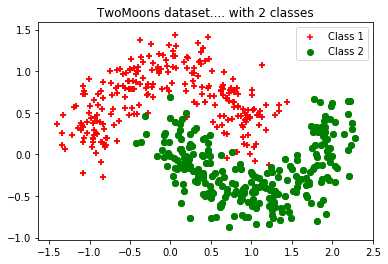

In [12]:
# np.asscalar(train_y[1])
visualize(train_x,train_y)

In [8]:
def svm_predict(trained_model,X,y):
    pred=trained_model.predict(X)
    return pred,(accuracy_score(y,pred,normalize=True)),(metrics.classification_report(y, pred))

Create a function svm_predict receiving the model trained above, a matrix Xt of samples
for testing and their expected outcomes yt
. The function should return a vector of predicted
outcomes and and a structure with the performance (including the accuracy, recall, FPR and
precision) on the testing samples.

In [9]:
predictions,test_accuracy,test_report=svm_predict(trained_model,test_x,test_y)

In [10]:
print(train_report)
print(test_report)

             precision    recall  f1-score   support

          1       0.88      0.85      0.86       246
          2       0.86      0.89      0.87       254

avg / total       0.87      0.87      0.87       500

             precision    recall  f1-score   support

          1       0.91      0.90      0.91       245
          2       0.91      0.92      0.91       255

avg / total       0.91      0.91      0.91       500



In [11]:
#defining a dictionary of classifier
kernels = {'linear', 'rbf'}
cs = {0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000}

for k in kernels:
    for c in cs:
        print(k, c)

rbf 0.1
rbf 1
rbf 100
rbf 1000
rbf 10
rbf 0.01
rbf 10000
rbf 0.001
linear 0.1
linear 1
linear 100
linear 1000
linear 10
linear 0.01
linear 10000
linear 0.001
